In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X,y):
        self.w_ = np.zeros(1 +X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X,y):
                update = self.eta * (target-self.predict(Xi))
                self.w_[1:] += update*Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0,1,-1)
    

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


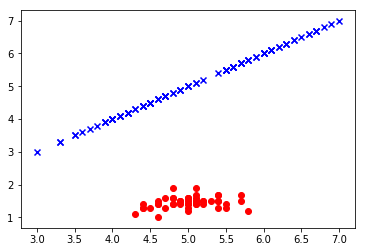

In [5]:

y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100], X[50:100], color='blue', marker='x', label='versicolor')
plt.show()

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


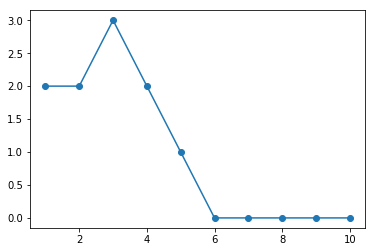

In [6]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
print(ppn.errors_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.show()

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z =Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

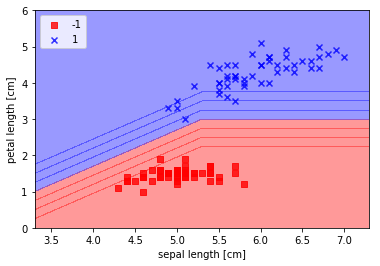

In [8]:
plot_decision_regions(X, y, classifier=ppn,resolution=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Implementing an Adaptive Linear Neuron in Python

In [9]:
# class AdalineGD(object):
#     def __init__(self,eta=0.01,n_iter=50):
#         self.eta = eta
#         self.n_iter = n_iter
        
#     def fit(self,X,y):
#         self.w_ = np.zeros(1+X.shape[1])
#         self.cost_ = []
        
#         for i in range(self.n_iter):
#             output = self.net_input(X)
#             errors = (y-output)
#             self.w_[1:] = self.eta*X.T.dot(errors)
#             self.w_[0] = self.eta*errors.sum()
#             cost = (errors**2).sum()/2.0
#             self.cost_.append(cost)
#         return self
#     def net_input(self,X):
#         return np.dot(X, self.w_[1:]) + self.w_[0]
#     def activation(self,X):
#         return net_input(X)
#     def predict(self,X):
#         return np.where(self.activation(X) >= 0.0, 1, -1)

class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in square


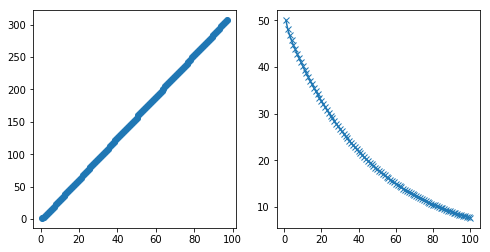

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1 = AdalineGD(n_iter=100).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) +1),np.log10(ada1.cost_),marker='o')

ada2 = AdalineGD(n_iter=100,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) +1), (ada2.cost_),marker='x')
plt.show()

In [11]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std.mean() )/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std.mean() )/X_std[:,1].std()



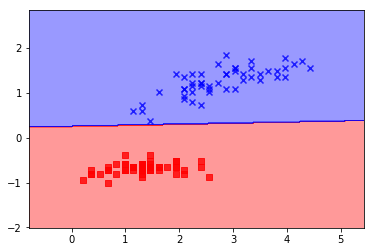

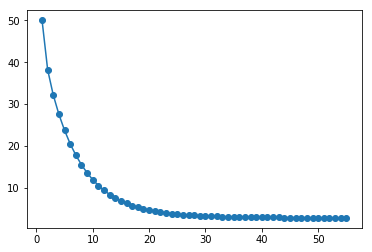

In [12]:
ada = AdalineGD(n_iter = 55,eta=0.001).fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.show()

# Stochastic Gradient Descent


In [25]:
class AdalineSGD(object):
    def __init__(self,eta=0.01,n_iter=50,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if(random_state):
            seed(random_state)
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self,X,y):
        if not self.w_intialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self,m):
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta*error
        cost = 0.5 *error**2
        return cost
    def net_input(self,X):
        return np.dot(X , self.w_[1:]) + self.w_[0]
    def activation(self,X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >=0.0,1,-1)
    
        
    
        

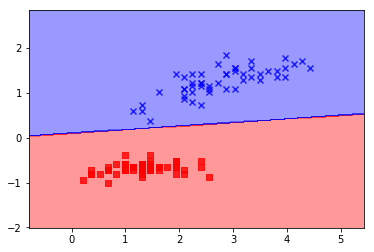

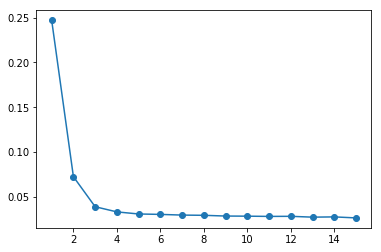

In [29]:
ada = AdalineSGD(n_iter = 15, random_state = 1)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.show()

plt.plot(range(1,len(ada.cost_) + 1), ada.cost_, marker='o')
